In [211]:
# Data Management/Investigation
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import ggplot, geom_histogram, facet_wrap, theme_minimal, theme, geom_boxplot, scale_x_discrete, labs, coord_flip, geom_point, geom_abline, theme_bw, aes
import seaborn as sns
import matplotlib.pyplot as plt
import country_converter as coco

# For pre-processing data
from sklearn import preprocessing as pp
from sklearn.compose import ColumnTransformer

# For splits and CV
from sklearn.model_selection import KFold # Cross validation
from sklearn.model_selection import cross_validate # Cross validation
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [175]:
#Importing 2003 fractionalization dataset & dropping 5 rows
maam = pd.read_excel(r'Datasets/2003_fractionalization.xls').drop([0,1,217,218,219])

#Renaming the columns
maam.columns = ['Country', 'Source (Ethnicity Data)', 'Date (Ethnicity Data)', 'Ethnic', '2001', 'Religion']

#Dropped specific columns
maam = maam.drop(columns = ['Source (Ethnicity Data)', 'Date (Ethnicity Data)', 'Ethnic', 'Religion']).reset_index(drop = True)

In [176]:
maam

,Country,2001
0,Afghanistan,0.614146
1,Albania,0.0399248
2,Algeria,0.442662
3,American Samoa,0.173254
4,Andorra,0.684785
...,...,...
210,West Bank,0.143801
211,Yemen,0.0079817
212,Yugoslavia (pre 1991),0.405007
213,Zambia,0.873408


In [178]:
#Importing 1965 and 1985 fractionalization dataset
sir = pd.read_excel(r'Datasets/fractionalization_2000.xls').drop(columns = [1, 3, 4, 5, 7, 8, 10, 11, 12]).drop([0]).reset_index(drop = True)

#Renaming the columns
sir.columns = ['COUNTRY', '1961', '1985']

Columns 6 and 9 report an ELF Index (for 1961 and 1985, respectively) that uses none of the groupings reported in the sources when data on sub-groups are available.  (For example, it treats separate Native American groups as separate ethnic groups rather than combining these in a catch-all "Indigenous Peoples".  Similarly,  it treats  Hutus and Tutsis as separate ethnic groups rather than grouping these as  Banyarwanda in Rwanda or Barundi in Burundi). In addition, in settler societies of the Western Hemisphere, this index treats racial distinctions within ethnolinguistic groups (Afro-Americans versus White Americans or Afro-Colombians versus Euro-Colombians) as separate ethnic groups.

In [179]:
sir

,COUNTRY,1961,1985
0,USA,0.501,0.575
1,Canada,0.755,0.769
2,Bahamas,0.226,0.408
3,Cuba,0.639,0.638
4,Haiti,0.014,0.011
...,...,...,...
178,New Zealand,0.373,0.421
179,Vanuatu,0.412,0.34
180,Solomon,NaN,0.954
181,Fiji,0.711,0.684


In [180]:
#Created a new list from the first column
un_maam = maam.Country.tolist()

#Country-converter variable to restrict the set to only the official recognized UN members
cc_UN = coco.CountryConverter(only_UNmember=True)

#Ran cc_UN on 'bit_country' and saved that list as 'UN'
UN = cc_UN.convert(un_maam, to = 'name_short')

#Dropped the 'temp_country' column from the dataframe
maam = maam.drop(columns = "Country")

American Samoa not found in regex
Aruba not found in regex
Bermuda not found in regex
Faroe Islands not found in regex
French Guiana  not found in regex
French Polynesia not found in regex
Gaza Strip not found in regex
Greenland not found in regex
Guadeloupe not found in regex
Guam not found in regex
Hong Kong not found in regex
Isle of Man not found in regex
Jersey not found in regex
Macau not found in regex
Martinique not found in regex
Mayotte not found in regex
Netherlands Antilles not found in regex
New Caledonia not found in regex
Northern Mariana Islands not found in regex
Puerto Rico not found in regex
Reunion not found in regex
Serbia/Montenegro (Yugoslavia) not found in regex
Taiwan not found in regex
Virgin Islands (U.S.) not found in regex
West Bank not found in regex
Yugoslavia (pre 1991) not found in regex


In [181]:
#Created a new column called 'country' and set those values as 'UN'
maam["Country"] = UN

#Set the index as the 'country' column
maam = maam.set_index('Country')

#Dropped any rows that had a "not found" value
maam = maam.drop(index = "not found")

#Reset the index in order to remove the "country" column as the index
maam = maam.reset_index()

In [182]:
#Created a new list from the first column
un_sir = sir.COUNTRY.tolist()

#Country-converter variable to restrict the set to only the official recognized UN members
cc_UN = coco.CountryConverter(only_UNmember=True)

#Ran cc_UN on 'bit_country' and saved that list as 'UN'
UNsir = cc_UN.convert(un_sir, to = 'name_short')

#Dropped the 'temp_country' column from the dataframe
sir = sir.drop(columns = "COUNTRY")

Germay (United) not found in regex
West Germany not found in regex
East Germany not found in regex
Yugoslavia not found in regex
Yugoslavia (United) not found in regex
USSR not found in regex
CAR not found in ISO3
Congo (B) not found in regex
UAE not found in ISO3
Taiwan not found in regex
North Vietnam not found in regex
South Vietnam not found in regex


In [183]:
#Created a new column called 'country' and set those values as 'UN'
sir["Country"] = UNsir

#Set the index as the 'country' column
sir = sir.set_index('Country')

#Dropped any rows that had a "not found" value
sir = sir.drop(index = "not found")

#Reset the index in order to remove the "country" column as the index
sir = sir.reset_index()

In [227]:
sir

,Country,1961,1985
0,United States,0.501,0.575
1,Canada,0.755,0.769
2,Bahamas,0.226,0.408
3,Cuba,0.639,0.638
4,Haiti,0.014,0.011
...,...,...,...
166,New Zealand,0.373,0.421
167,Vanuatu,0.412,0.34
168,Solomon Islands,NaN,0.954
169,Fiji,0.711,0.684


In [228]:
#Outer merged both fractionalization measures 
baby = pd.merge(maam,sir,on = 'Country', how = 'outer')

#Filled the NA values into 
test = baby.dropna()

#Changed the values of the periods into 0
test.loc[test['2001'] == '.'] = 0

In [229]:
test

,Country,2001,1961,1985
0,Afghanistan,0.614146,0.659,0.668
1,Albania,0.0399248,0.093,0.064
2,Algeria,0.442662,0.426,0.299
4,Angola,0.787019,0.79,0.783
6,Argentina,0.0617542,0.307,0.288
...,...,...,...,...
188,Venezuela,0.0685801,0.428,0.524
191,Yemen,0.0079817,0.037,0.017
192,Yemen,0.0079817,0.172,0.162
193,Zambia,0.873408,0.818,0.807


In [230]:
hello = pd.melt(test, id_vars=['Country'], value_vars=['1961', '1985', '2001'])

In [231]:
hello['value'] = hello['value'].astype(float)
hello['variable'] = hello['variable'].astype(float)

In [232]:
hello.dtypes

Country      object
variable    float64
value       float64
dtype: object

Text(0.5, 1.0, 'Daily New Deaths per 100,000 vs 2016 Presidential Winners per State')

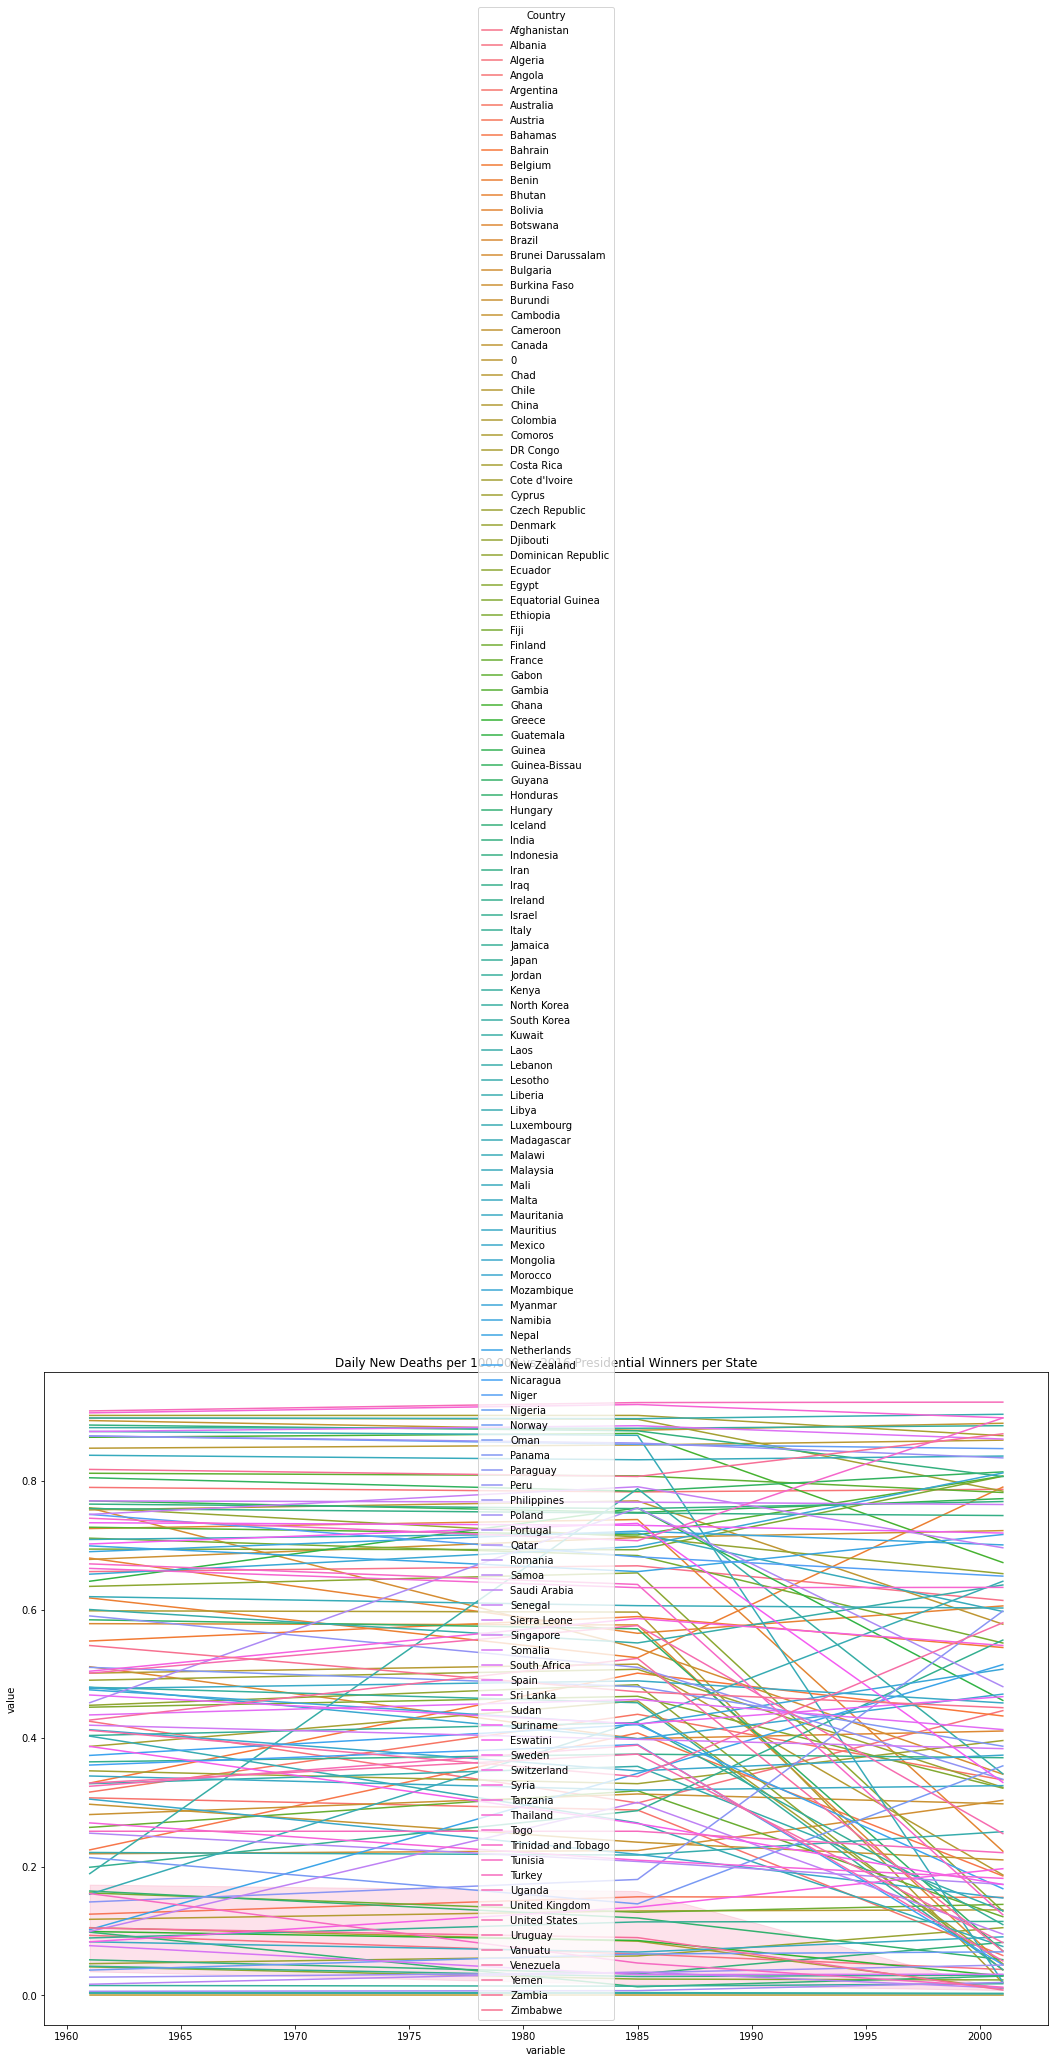

In [233]:
fig, ax = plt.subplots(figsize=(18, 12))
ax= sns.lineplot(data = hello, x = 'variable', y = 'value', hue = 'Country')
ax.set_title("Daily New Deaths per 100,000 vs 2016 Presidential Winners per State")


<AxesSubplot:xlabel='variable', ylabel='value'>

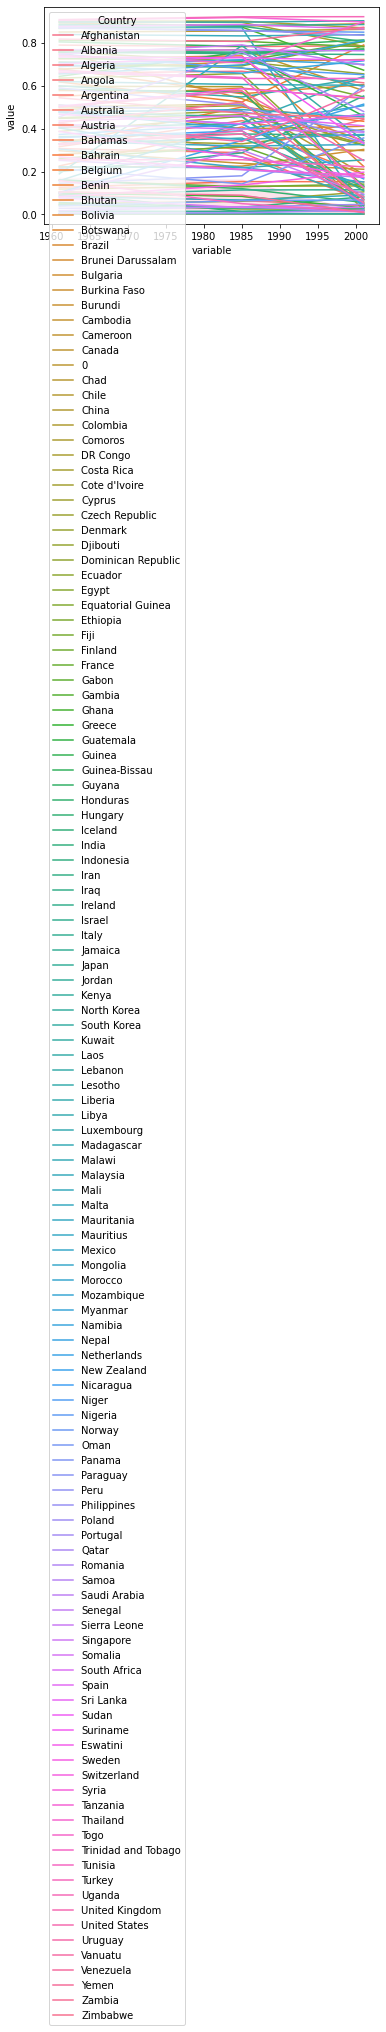

In [234]:
sns.lineplot(data = hello, x = 'variable', y = 'value', hue = 'Country')


In [36]:
#Importing 2003 fractionalization dataset & dropping 5 rows
heir = pd.read_excel(r'Datasets/BL2013_F_v2.2.xls').drop(columns = ['Unnamed: 4',
                                                                    'Unnamed: 5', 
                                                                    'Unnamed: 6', 
                                                                    'Unnamed: 7',
                                                                    'Unnamed: 8',
                                                                    'Unnamed: 9',
                                                                    'Unnamed: 10',
                                                                    'Unnamed: 12',
                                                                    'Unnamed: 13',
                                                                    'Unnamed: 14',
                                                                    'Unnamed: 15',
                                                                    'Unnamed: 16'])

#Renaming the columns
heir.columns = ['Country', 'Year', 'Age Group Min', 'Age Group Max', 'Avg. Years of Total Schooling']

#Dropped specific rows
heir = heir.drop(np.arange(13)).reset_index(drop = True)

In [50]:
temp = heir
temp

,Country,Year,Age Group Min,Age Group Max,Avg. Years of Total Schooling
0,Australia,1950,15,19.0,8.54
1,NaN,1950,20,24.0,8.63
2,NaN,1950,25,29.0,8.69
3,NaN,1950,30,34.0,8.16
4,NaN,1950,35,39.0,8.08
...,...,...,...,...,...
30797,NaN,2010,65,69.0,2.55
30798,NaN,2010,70,74.0,2.6
30799,NaN,2010,75,999.0,3.85
30800,NaN,2010,25,999.0,6.69


In [47]:
temp.Country

0        Australia
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
30797          NaN
30798          NaN
30799          NaN
30800          NaN
30801          NaN
Name: Country, Length: 30802, dtype: object

In [52]:
for x in range(5): 
    if pd.isna(temp.Country[x]) == False:
        country = temp.Country[x]
    else:
        temp.Country.replace(x, country)

In [53]:
temp.replace.Country(NaN, 0)

,Country,Year,Age Group Min,Age Group Max,Avg. Years of Total Schooling
0,Australia,1950,15,19.0,8.54
1,NaN,1950,20,24.0,8.63
2,NaN,1950,25,29.0,8.69
3,NaN,1950,30,34.0,8.16
4,NaN,1950,35,39.0,8.08
...,...,...,...,...,...
30797,NaN,2010,65,69.0,2.55
30798,NaN,2010,70,74.0,2.6
30799,NaN,2010,75,999.0,3.85
30800,NaN,2010,25,999.0,6.69


In [ ]:
df[df.isna().any(axis=1)]